In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# For reproducibility
import random
random.seed(120)


In [4]:
# Define paths
base_dir = "../../data/medical_images/"
raw_images_dir = os.path.join(base_dir, "raw/all_images/")
labels_csv = os.path.join(base_dir, "raw/image_labels.csv")


In [5]:
# Load the CSV file
df = pd.read_csv(labels_csv)

# Display the first few rows
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Preview:
      filename  label
0  image_0.jpg      0
1  image_1.jpg      0
2  image_2.jpg      0
3  image_3.jpg      0
4  image_4.jpg      0

Missing Values:
filename    0
label       0
dtype: int64


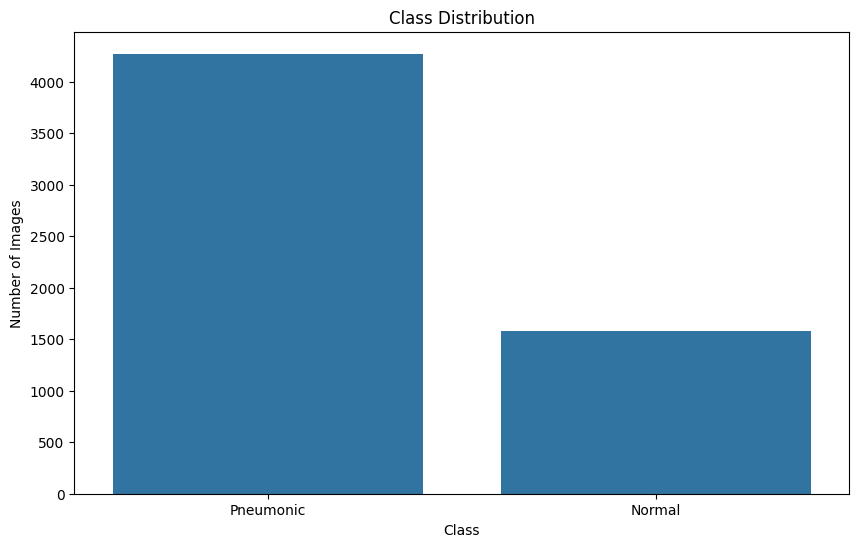


Class Distribution:
label
1    4273
0    1583
Name: count, dtype: int64

total number of images: 5856


In [7]:
# Count the number of samples per class
class_counts = df['label'].value_counts()
class_labels = {0: 'Normal', 1: 'Pneumonic'}

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index.map(class_labels), y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

print("\nClass Distribution:")
print(class_counts)

print("\ntotal number of images:", len(df))





Image Dimension Summary:
             Width       Height
count   100.000000   100.000000
mean   1270.350000   916.080000
std     316.230014   337.519133
min     689.000000   325.000000
25%    1000.000000   646.000000
50%    1240.000000   872.000000
75%    1476.250000  1086.250000
max    2078.000000  2067.000000


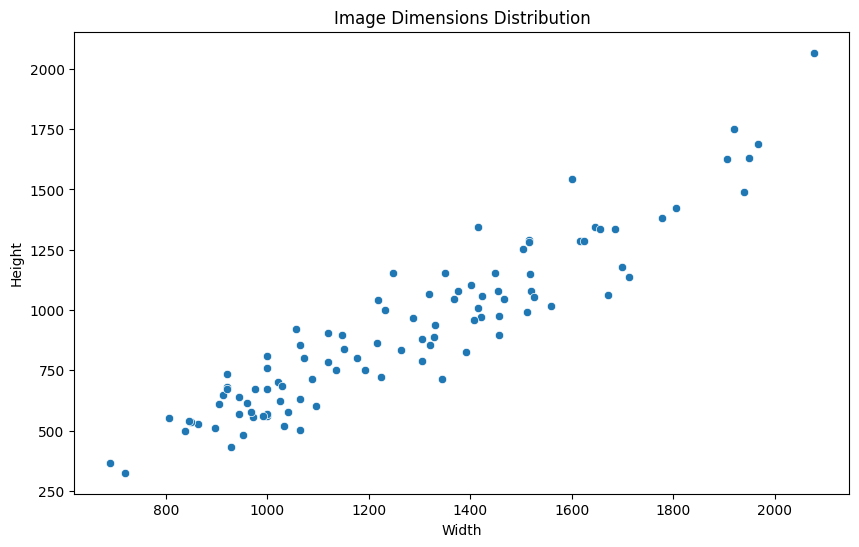

In [18]:
# Function to get image dimensions
def get_image_dimensions(image_dir, filenames):
    dimensions = []
    for filename in filenames:
        img = Image.open(os.path.join(image_dir, filename))
        dimensions.append(img.size)  # (width, height)
        img.close()
    return dimensions

# Analyze image dimensions
sample_filenames = df['filename'].sample(100, random_state=42)  # Analyze a subset for speed
image_dimensions = get_image_dimensions(raw_images_dir, sample_filenames)

# Convert dimensions to a DataFrame for analysis
dimensions_df = pd.DataFrame(image_dimensions, columns=['Width', 'Height'])

# Summary statistics
print("\nImage Dimension Summary:")
print(dimensions_df.describe())

# Plot the distribution of image dimensions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dimensions_df['Width'], y=dimensions_df['Height'])
plt.title("Image Dimensions Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()


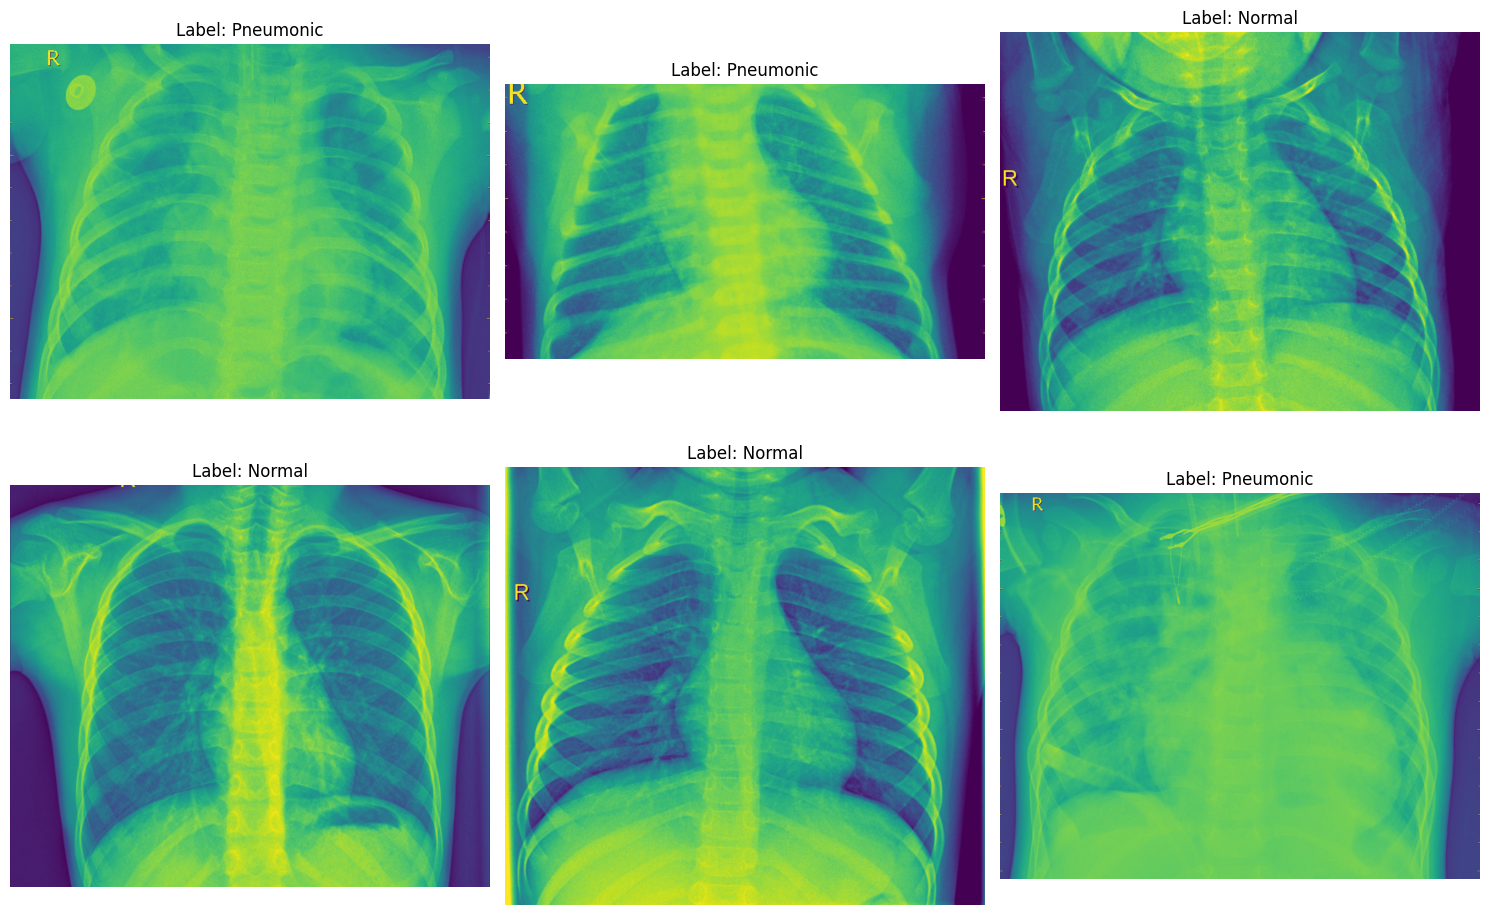

In [19]:
# Function to display random images
def plot_random_images(image_dir, df, n=6):
    samples = df.sample(n, random_state=42)
    plt.figure(figsize=(15, 10))
    for i, (_, row) in enumerate(samples.iterrows()):
        img = Image.open(os.path.join(image_dir, row['filename']))
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {class_labels[row['label']]}")
        plt.axis("off")
        img.close()
    plt.tight_layout()
    plt.show()

# Visualize random samples
plot_random_images(raw_images_dir, df, n=6)


**Summary:**
- The dataset consists of 5856 samples, distributed across 2 classes.
- Class distribution is imbalanced (or balanced) based on the visualization.
- Image dimensions vary widely, and resizing might be necessary for model input.
- No missing values or duplicates (if applicable).

**Next Steps:**
- Proceed to `2_data_preparation_medical_images.ipynb` to build and train models.
